#TP1 M1 info -- Introduction au traitement du signal, aux signaux sonores et aux images

**But du TP** :
* comprendre la structure d'un fichier son et d'une image
* comprendre comment afficher un fichier son ou image
* être capable de comprendre le changement de quantification et d'échantillonnage d'un fichier et être capable de générer ces changements sur un fichier.

**Avertissement** :
Il peut être tentant d'utiliser ChatGPT ou d'autres outils d'écriture de code. Mais il ne s'agit que d'une introduction, couvrant des concepts très simples pour manipuler des fichiers. Nous vous recommandons fortement de ne pas l'utiliser. Vous aurez suffisamment de temps pour réaliser par vous-même les quelques fonctions qui vous sont demandées. Et vous les assimilerez bien mieux. Vous devrez réutiliser ces fonctions pour l'évaluation, ce qui vous confrontera à de nouvelles données. Essayez donc de rendre ces fonctions aussi générales que possible.

In [ ]:
# OS setup
#!cat /etc/os-release
!apt-get install -q=2 tree

# Data loading
!git clone https://gitlab.com/jeromefarinas/tp-m1-ts.git

Selecting previously unselected package tree.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
Cloning into 'tp-m1-ts'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 63 (delta 0), reused 0 (delta 0), pack-reused 58
Receiving objects: 100% (63/63), 2.62 MiB | 11.35 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
# Some usefull library
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
from IPython.display import Audio

In [ ]:
!tree tp-m1-ts/tp1/

tp-m1-ts/tp1/
├── diner.wav
├── photo.jpg
└── resultat_attendu
    ├── diner_16khz_12bits.wav
    ├── diner_16khz_2bits.wav
    ├── diner_16khz_4bits.wav
    ├── diner_16khz_8bits.wav
    ├── diner_2khz_16bits.wav
    ├── diner_4khz_16bits.wav
    └── diner_8khz_16bits.wav

1 directory, 9 files


##Manipulation de fichiers numériques

###Signal audio

Vous pouvez essayer de charger le fichier audio avec [wav.read](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html) à partir de la bibliothèque [scipy.io.wavfile](https://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io.wavfile) :

In [ ]:
import scipy.io.wavfile as wav
fs, signal = wav.read('tp-m1-ts/tp1/diner.wav')

Ecouter le signal :

In [ ]:
Audio(data=signal, rate=fs)

* Affichez les valeurs suivantes : la fréquence d'échantillonnage, la quantification de ce fichier, le nombre d'échantillons

In [ ]:
# Afficher la fréquence d'échantillonnage
print("Fréquence d'échantillonnage:", fs)

# Afficher la quantification du fichier
quantization = signal.dtype
print("Quantification du fichier:", quantization)

# Afficher le nombre d'échantillons
nb_echant = len(signal)
print("Nombre d'échantillons:", nb_echant)

Fréquence d'échantillonnage: 16000
Quantification du fichier: int16
Nombre d'échantillons: 175125
[ 0  0 -1 ...  0 -4 -6]


* Afficher graphiquement le signal, avec l'axe des x en secondes

<function matplotlib.pyplot.show(close=None, block=None)>

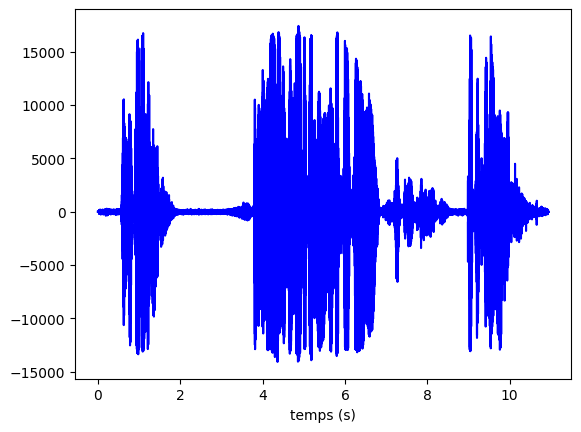

In [ ]:
# Calculer l'axe des x en secondes
time = np.arange(len(signal))/fs

plt.plot(time, signal, "b")
plt.xlabel('temps (s)')
plt.show

* Transformer des données du signal (qui est en entiers de $-2^{15}+1$ à $2^{15}$) en réels entre -1 et 1. C'est juste une nouvelle version des données, qui vous permettra de moins déborder au niveau des calculs lors de vos manipulations.

In [ ]:
signal_normalized = signal/2**15

* Affichez a nouveau graphiquement ce signal en réels avec l'axe des abscisses en secondes. Ca ne devrait pas différer au niveau de la forme du signal en dehors de la plage de valeurs en ordonnée.


<function matplotlib.pyplot.show(close=None, block=None)>

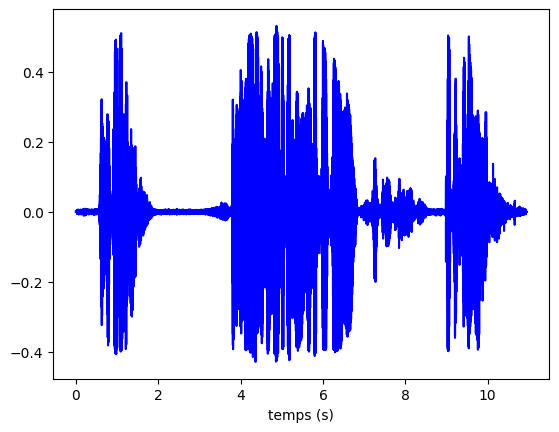

In [ ]:
plt.plot(time, signal_normalized, "b")
plt.xlabel('temps (s)')
plt.show

* Affichez les valeurs des 50 premières valeurs à partir de l'index 2000. Affichez aussi graphiquement ces valeurs, avec les points représentés par des "*" rouges, et les traits entre les points en bleu.


[ 6.10351562e-05 -2.13623047e-04 -7.32421875e-04 -3.96728516e-04
 -9.15527344e-05 -6.40869141e-04 -1.43432617e-03 -1.86157227e-03
 -1.40380859e-03  4.27246094e-04  2.04467773e-03  1.34277344e-03
 -1.03759766e-03 -2.68554688e-03 -2.86865234e-03 -2.07519531e-03
 -7.01904297e-04 -1.52587891e-04 -1.92260742e-03 -4.39453125e-03
 -4.30297852e-03 -2.04467773e-03 -1.03759766e-03 -1.58691406e-03
 -1.52587891e-03 -4.57763672e-04 -3.66210938e-04 -1.40380859e-03
 -1.98364258e-03 -1.86157227e-03 -2.22778320e-03 -2.62451172e-03
 -2.04467773e-03 -1.12915039e-03 -5.79833984e-04 -9.15527344e-05
  1.83105469e-04 -8.85009766e-04 -2.28881836e-03 -1.92260742e-03
 -4.57763672e-04  3.05175781e-05 -1.52587891e-04  3.66210938e-04
  1.00708008e-03  8.54492188e-04  8.54492188e-04  1.34277344e-03
  1.34277344e-03  8.85009766e-04]


<function matplotlib.pyplot.show(close=None, block=None)>

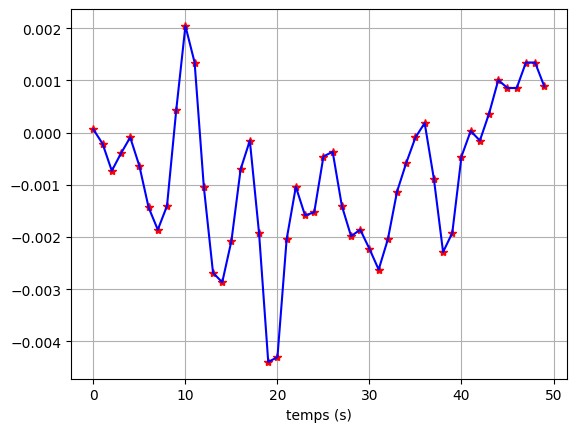

In [ ]:
index_debut = 2000
nb_valeur = 50

# Extraire les valeurs à afficher
valeur_afficher = signal_normalized[index_debut:index_debut+nb_valeur]
# Afficher les valeurs
print(valeur_afficher)

# * pour les points et - pour les traits
plt.plot(np.arange(nb_valeur),valeur_afficher,"r*")
plt.plot(np.arange(nb_valeur),valeur_afficher,"b-")
plt.xlabel("temps (s)")
plt.grid(True)
plt.show

Vous allez écouter le fichier en version ralentie et accélérée.



In [ ]:
Audio(data=signal, rate=fs/2)


In [ ]:
Audio(data=signal, rate=fs*2)

Qu'advient-il des fréquences ? Cette transformation est-elle normale ? Ainsi, si l'on veut jouer plus rapidement un fichier son, quel type de transformation sera nécessaire pour avoir des fréquences normales ? Est-ce que c'est ce que fait youtube avec le changement de débit à la lecture des vidéos ?

- Lorsqu'on diminu la fréquence d'échantillonnage (fs/2 dans le 1er exemple),
cela a pour effet d'étirer le signal dans le temps, ce qui ralentit la lecture audio.
- Lorsqu'on diminu la fréquence d'échantillonnage (fs*2 dans le 2eme exemple), cela compresse le signal dans le temps, accélérant la lecture audio.

Quand on modifie la fréquence d'échantillonnage d'un signal audio sans ajuster les données du signal lui-même, cela affecte la hauteur perçue du son.
Pour jouer un fichier son plus rapidement tout en maintenant les fréquences à des niveaux normaux, il faut ajuster à la fois la fréquence d'échantillonnage et les données du signal. Cela implique généralement d'appliquer une technique de resampling pour ajuster la fréquence d'échantillonnage et de modifier le signal lui-même.


### Image

In [ ]:
img = plt.imread('tp-m1-ts/tp1/photo.jpg')

* Indiquer les caractéristiques de l'image : taille, type d'éléments


In [ ]:
taille = img.shape
type_elem = img.dtype

print("Taille de l'image:", taille)
print("Type d'éléments de l'image:", type_elem)

Taille de l'image: (595, 900, 3)
Type d'éléments de l'image: uint8


* Affichez graphiquement cette image


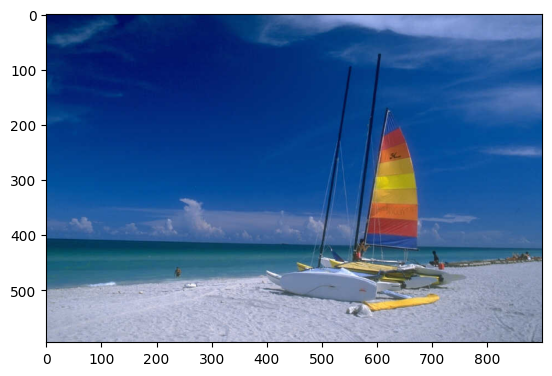

In [ ]:
# Afficher l'image
plt.imshow(img)
plt.show()

* Afficher les intensités RVB du premier pixel de l'image

In [ ]:
#Le premier 0 fait référence à l'indice de la ligne du pixel
#Le deuxième 0 fait référence à l'indice de la colonne du pixel
#Le : dans la troisième position indique que nous voulons accéder à tous les éléments le long de la troisième dimension
premier_pixel = img[0,0,:]

# Afficher les intensités RVB
print("Intensités RVB du premier pixel:", premier_pixel)

Intensités RVB du premier pixel: [ 2 16 91]


##Quantification, échantillonnage

* Écrire une fonction pour sous-quantifier un fichier audio. Testez-la avec une quantification de 12 bits, 8 bits, 4 bits et 2 bits. Affichez à chaque fois un graphique avec chaque transformation. Que pensez-vous de la qualité sonore obtenue ?

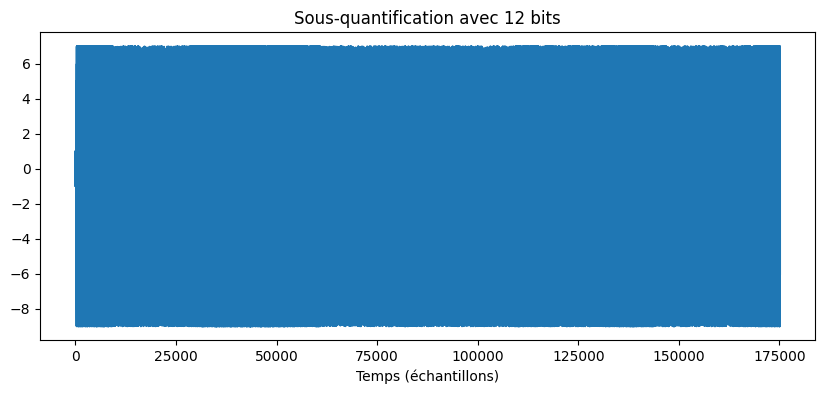

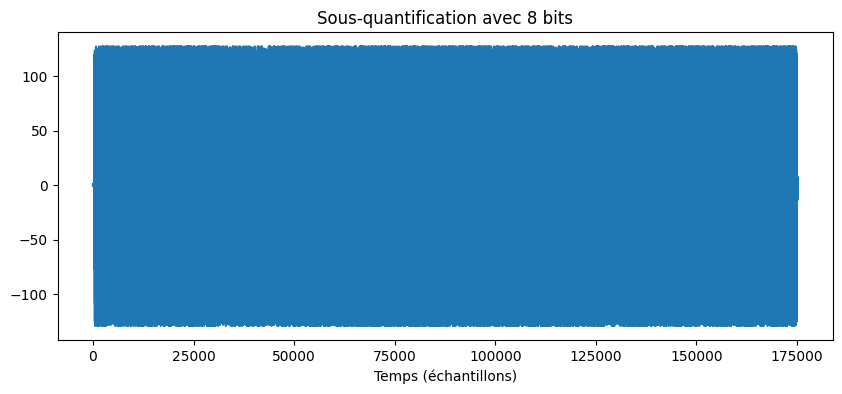

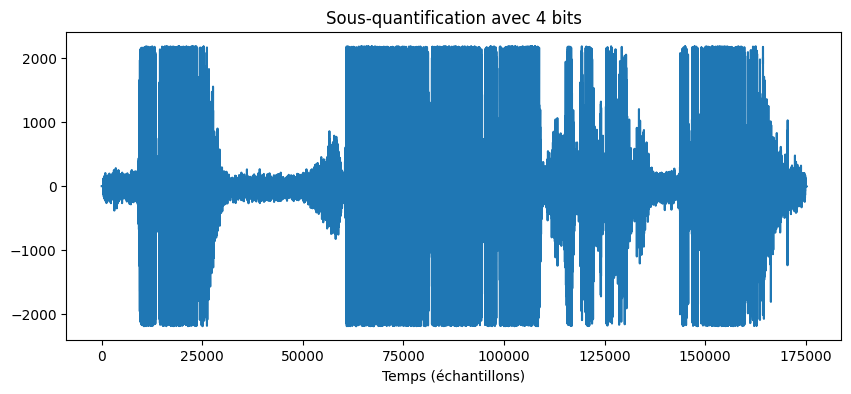

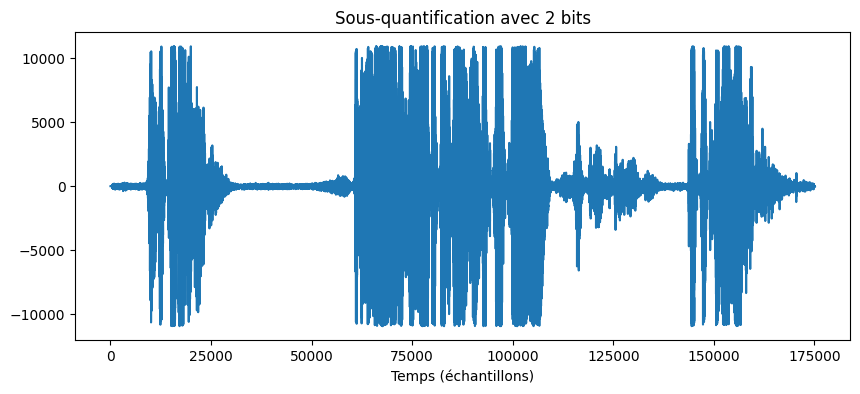

In [ ]:
def sous_quantification(data, bits):
    # Nombre de niveaux de quantification
    levels = 2 ** bits

    # Sous-quantification des données
    quantized_data = np.round((data + 1) * (levels - 1) / 2) * (2 / (levels - 1)) - 1

    return quantized_data


# Tester avec différentes quantifications
quantifications = [12, 8, 4, 2]

for bits in quantifications:
    # Sous-quantifier les données audio
    quantized_signal = sous_quantification(signal_normalized, bits)

    # Afficher le signal sous-quantifié
    plt.figure(figsize=(10, 4))
    plt.plot(quantized_signal)
    plt.xlabel('Temps (échantillons)')
    plt.title(f'Sous-quantification avec {bits} bits')
    plt.show()


* Écrire une fonction pour sauvegarder une variable audio dans un fichier. Vous pouvez utiliser [wav.write](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html). Vérifiez que l'échantillonnage et la quantification sont corrects dans les fichiers résultants.


In [ ]:
# à vous...

* Écrire une fonction pour sous-échantillonner un fichier audio (encodé en nombres entiers ou flottants). Testez-la avec un sous-échantillonnage x2, x4 et x8. Que remarquez-vous ?

In [ ]:
# à vous...

* Ecrivez une fonction pour sous-quantifier une image en conservant les n bits les plus significatifs (les autres sont mis à 0). Testez-la avec 2 bits et 3 bits. Que remarquez-vous ?
Note : Vous pouvez utiliser [numpy.bitwise_and](https://numpy.org/doc/stable/reference/generated/numpy.bitwise_and.html) pour accéder à la valeur d'un bit.

In [ ]:
# à vous...